# Tryout of average polution time series code

In [22]:
import requests
import datetime
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [23]:
from ipynb.fs.full.Load_Data import load_data
from ipynb.fs.full.Clean_Data import remove_missing
from ipynb.fs.full.Clean_Data import remove_outliers

In [24]:
df = load_data(lat_start = 48, lat_end = 49, long_start = 9, long_end = 10, start_year = 2018, start_month = 4, start_day = 30, delta_hours = 1)
df = remove_missing(df)
df = remove_outliers(df,method = "quantile")

13544 observations were removed from the data frame
212 observations were deleted


In [25]:
output_date = datetime.datetime.now().strftime("%Y-%m-%dT%H:%M:%SZ")
output_date

'2021-06-22T21:41:06Z'

In [26]:
# print(df_pivot[df_pivot[‘Name’]==’Donna’].index.values)

In [27]:
# df_pivot.mean(axis = 1)

In [28]:
max1 = max(df.groupby("sensor_id").mean()['measurement_PM10'])

In [29]:
df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM10'] == max1].index[0]

'467'

In [30]:
df.index[0]

0

In [31]:
df.loc[df['sensor_id'] == '467']

,measurement_PM10,measurement_PM2.5,time,lat,lon,sensor_id,measurement_id
260,86.93,3.72,2018-04-30T00:00:40Z,48.741,9.317,467,467_2018-04-30T00:00:40Z
1424,87.43,4.10,2018-04-30T00:03:07Z,48.741,9.317,467,467_2018-04-30T00:03:07Z
2575,87.53,4.05,2018-04-30T00:05:33Z,48.741,9.317,467,467_2018-04-30T00:05:33Z
6057,87.12,4.07,2018-04-30T00:12:54Z,48.741,9.317,467,467_2018-04-30T00:12:54Z
7215,87.32,3.90,2018-04-30T00:15:21Z,48.741,9.317,467,467_2018-04-30T00:15:21Z
9529,87.32,4.15,2018-04-30T00:20:14Z,48.741,9.317,467,467_2018-04-30T00:20:14Z
10691,87.55,4.32,2018-04-30T00:22:41Z,48.741,9.317,467,467_2018-04-30T00:22:41Z
11840,87.15,3.65,2018-04-30T00:25:07Z,48.741,9.317,467,467_2018-04-30T00:25:07Z
13008,87.32,3.80,2018-04-30T00:27:34Z,48.741,9.317,467,467_2018-04-30T00:27:34Z
15338,87.30,3.80,2018-04-30T00:32:28Z,48.741,9.317,467,467_2018-04-30T00:32:28Z


In [32]:
series = pd.DataFrame({'time': df.loc[df['sensor_id'] == '467']['time'], 'measurement': df.loc[df['sensor_id'] == '467']['measurement_PM10']})

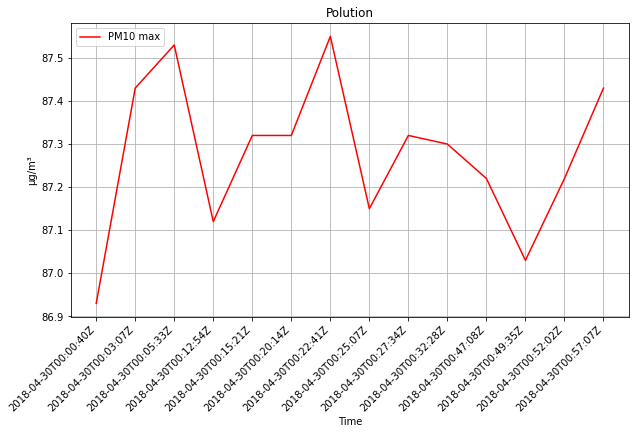

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(series.time, series.measurement, label='PM10 max', c = 'red')
ax.set_xlabel('Time')
ax.set_ylabel('μg/m³')
ax.set_title('Polution')
ax.grid(True)
ax.legend(loc='upper left')
fig.autofmt_xdate(rotation=45)

In [34]:
max_PM10 = max(df.groupby("sensor_id").mean()['measurement_PM10'])
min_PM10 = min(df.groupby("sensor_id").mean()['measurement_PM10'])
max_PM10_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM10'] == max_PM10].index[0]
min_PM10_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM10'] == min_PM10].index[0]
df_max_PM10 = df.loc[df['sensor_id'] == max_PM10_id]
df_min_PM10 = df.loc[df['sensor_id'] == min_PM10_id]

### Talk about this tomorrow

In [35]:
df_min_PM10           # talk about the zeros tomorrow!

,measurement_PM10,measurement_PM2.5,time,lat,lon,sensor_id,measurement_id
615,0.00,0.00,2018-04-30T00:01:18Z,48.517,9.15,8598,8598_2018-04-30T00:01:18Z
1778,0.00,0.00,2018-04-30T00:03:46Z,48.517,9.15,8598,8598_2018-04-30T00:03:46Z
2950,0.00,0.00,2018-04-30T00:06:14Z,48.517,9.15,8598,8598_2018-04-30T00:06:14Z
4113,0.00,0.00,2018-04-30T00:08:42Z,48.517,9.15,8598,8598_2018-04-30T00:08:42Z
5319,0.00,0.00,2018-04-30T00:11:14Z,48.517,9.15,8598,8598_2018-04-30T00:11:14Z
6491,0.00,0.00,2018-04-30T00:13:42Z,48.517,9.15,8598,8598_2018-04-30T00:13:42Z
7659,0.00,0.00,2018-04-30T00:16:11Z,48.517,9.15,8598,8598_2018-04-30T00:16:11Z
8829,0.00,0.00,2018-04-30T00:18:39Z,48.517,9.15,8598,8598_2018-04-30T00:18:39Z
10000,0.00,0.00,2018-04-30T00:21:07Z,48.517,9.15,8598,8598_2018-04-30T00:21:07Z
11181,0.00,0.00,2018-04-30T00:23:35Z,48.517,9.15,8598,8598_2018-04-30T00:23:35Z
